# Fraud detection using binary classification

Credit-card companies use sophisticated machine-learning models to examine transactions in real time and identify ones that are likely to be fraudulent. The features that they use to train such models are considered proprietary, but a few sample datasets have been published that use [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) and other means to obscure the meaning behind the numbers. In this exercise, we will use [one such dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud) containing anonymized information about approximately 285,000 credit-card purchases made by European cardholders in September 2013 to build a binary-classification model that predicts whether a transaction is legitimate.



The first step is to load the dataset.

In [1]:
import pandas as pd

df = pd.read_csv('Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The "Time" column reveals the number of seconds elapsed since the first transaction. "Class" tells us whether the transaction is legitimate (0) or fraudulent (1), and the "Amount" column shows the amount of the transaction. The remaining columns "V1" through "V28" were generated using PCA from information that isn't revealed to us. It most likely includes information about what was purchased, where it was purchased, and who purchased it. The latter might include information such as how long the member has been a cardholder, their credit score, their spending habits, their age, and their annual income.

Find out how many rows the dataset contains and whether any of those rows having missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset contains 284,807 rows, and none are missing values. Now check the balance: the number of rows representing legitimate transactions (Class=0) vs. the number of rows representing fraudulent transactions (Class=1).

In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The dataset is highly imbalanced, which isn't surprising given that legitimate credit-card transactions are far more common than fraudulent transactions. A machine-learning model trained on this data will be more accurate at identifying legitimate transactions than fraudulent transactions. That's OK, because we want to err on the side of allowing fraudulent transactions to slip through. Credit-card companies would rather let 100 fraudulent transactions go through unchallenged than bother one customer by flagging a legitimate transaction as fraudulent.

Split the data for training and testing, and use `train_test_split`'s `stratify` parameter to ensure that the ratio of legitimate and fraudulent transactions is consistent in the training dataset and the testing dataset.

In [4]:
from sklearn.model_selection import train_test_split

x = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

Train a model that uses logistic regression to separate the classes.

In [5]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, max_iter=5000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=5000, random_state=0)

A typical accuracy score computed by divding the sum of the true positives and true negatives by the number of test samples isn't very helpful because the dataset is so imbalanced. Fraudulent transactions represent less than 0.2% of all the samples, which means that the model could simply guess that *every* transaction is legitimate and get it right about 99.8% of the time. Use a confusion matrix to visualize how the model performs during testing.

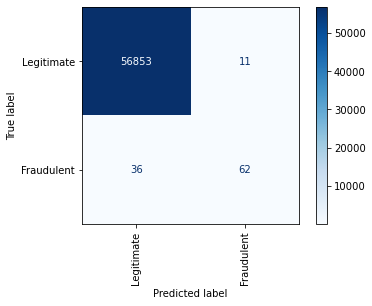

In [6]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

labels = ['Legitimate', 'Fraudulent']
plot_confusion_matrix(lr_model, x_test, y_test, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

A logistic-regression model correctly identified 56,853 transactions as legitimate while misclassifying legitimate transactions as fraudulent just 11 times. We want to minimize the latter number because we don't want to annoy customers by declining legitimate transactions. Let's see if a random-forest classifier can do even better.

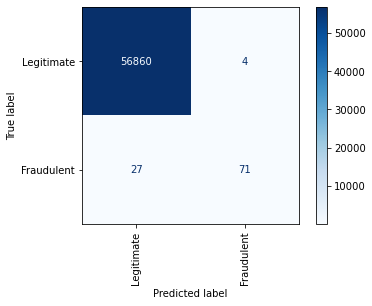

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)

plot_confusion_matrix(rf_model, x_test, y_test, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

A random forest mistook just 4 legitimate transactions as fraudulent. That's an improvement over logistic regression. Let's see if a gradient-boosting classifier can do better still.

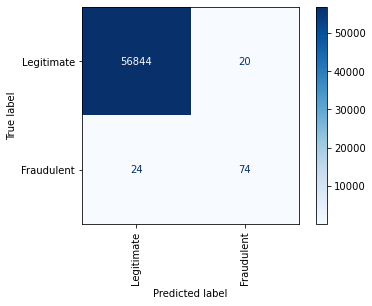

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(random_state=0)
gbm_model.fit(x_train, y_train)

plot_confusion_matrix(gbm_model, x_test, y_test, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

The GBM misclassified more legitimate transactions than the random forest, so we'll stick with the random forest. Out of 56,864 legitimate transactions, the random forest correctly classified 56,860 of them. This means that legitimate transactions are classified correctly more than 99.99% of the time. Meanwhile, the model caught about 75% of the fraudulent transactions.

Unfortunately, we can't make predictions with this model because we don't know the meaning of the numbers in the "V1" through "V28" columns, and we can't generate them because we don't have the PCA transform applied to the original dataset. Nor do we know what the original dataset looked like. However, we have proved the principle that given the right features, we can build a classification model that is reasonably accurate at detecting credit-card fraud.